In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('avocado.csv')


In [3]:
df.describe()


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [4]:
price=df["AveragePrice"]
ano=df['year']
tipo=df['type']
region=df['region']
volume=df['Total Volume']
tipo1=df['4046']
tipo2=df['4225']
tipo3=df['4770']
bags1=df['Small Bags']
bags2=df['Large Bags']

In [5]:
def Relations(lista,var1,var2):
    lista1=[]
    lista2=[]
    total_price,total_volume=[],[]
    unic=np.unique(lista)
    if lista[0]==region[0]:
        unic=unic[unic!='TotalUS']
    for i in unic:
        for r in range(len(lista)):
            if i==lista[r]:
                lista1.append(var1[r])
                lista2.append(var2[r])
        if lista1!=[] and lista2!=[]:
            total_price.append(lista1)
            total_volume.append(lista2)
            lista1=[]
            lista2=[]
    return total_price,total_volume,unic

In [6]:
price_year,volume_year,years=Relations(ano,price,volume)
price_region,volume_region,regio=Relations(region,price,volume)
price_tipo,volume_tipo,types=Relations(tipo,price,volume)
smallbags_tipo,big_bags_tipo,types=Relations(tipo,bags1,bags2)

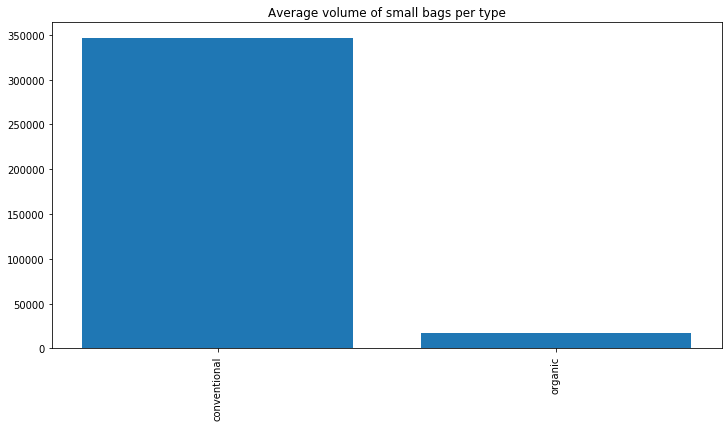

In [7]:
x=[np.mean(y) for y in smallbags_tipo]
plt.figure(0,figsize=(12,6))
plt.title("Average volume of small bags per type")
plt.xticks(rotation=90)
plt.bar(types,x)
plt.show()

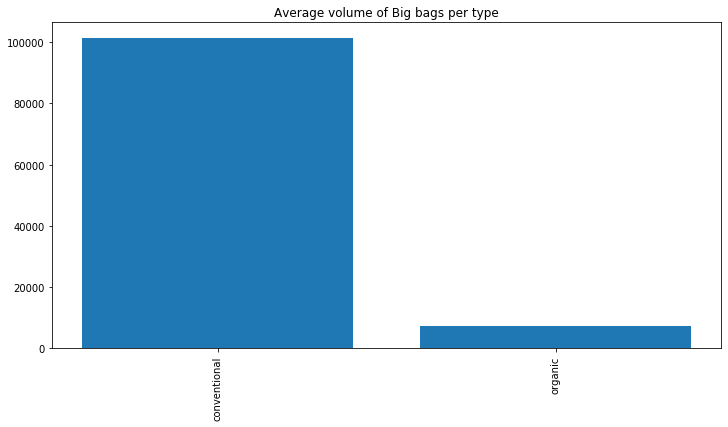

In [8]:
x=[np.mean(y) for y in big_bags_tipo]
plt.figure(0,figsize=(12,6))
plt.title("Average volume of Big bags per type")
plt.xticks(rotation=90)
plt.bar(types,x)
plt.show()

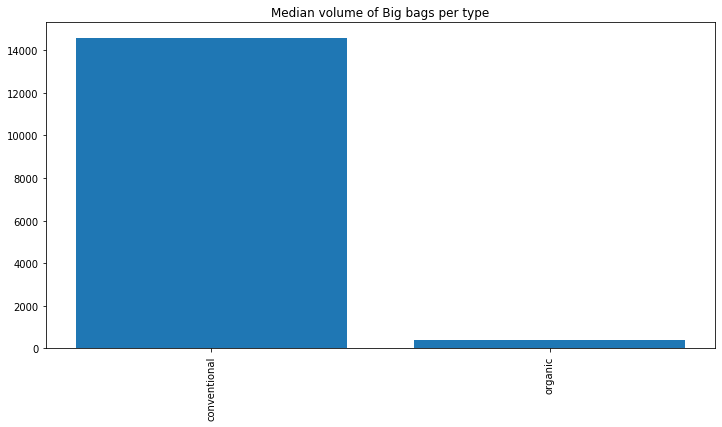

In [9]:
x=[np.median(y) for y in big_bags_tipo]
plt.figure(0,figsize=(12,6))
plt.title("Median volume of Big bags per type")
plt.xticks(rotation=90)
plt.bar(types,x)
plt.show()

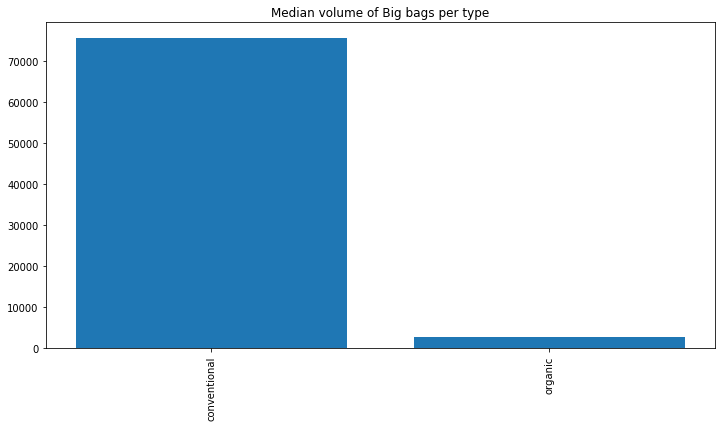

In [10]:
x=[np.median(y) for y in smallbags_tipo]
plt.figure(0,figsize=(12,6))
plt.title("Median volume of Big bags per type")
plt.xticks(rotation=90)
plt.bar(types,x)
plt.show()

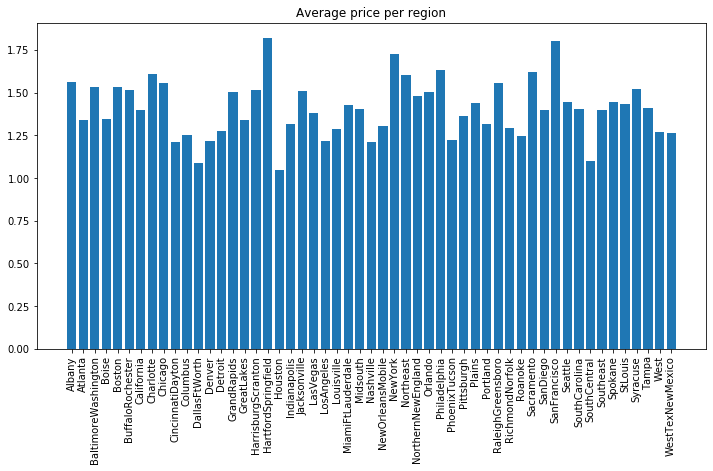

In [11]:
x=[np.mean(y) for y in price_region]
plt.figure(0,figsize=(12,6))
plt.title("Average price per region")
plt.xticks(rotation=90)
plt.bar(regio,x)
plt.show()

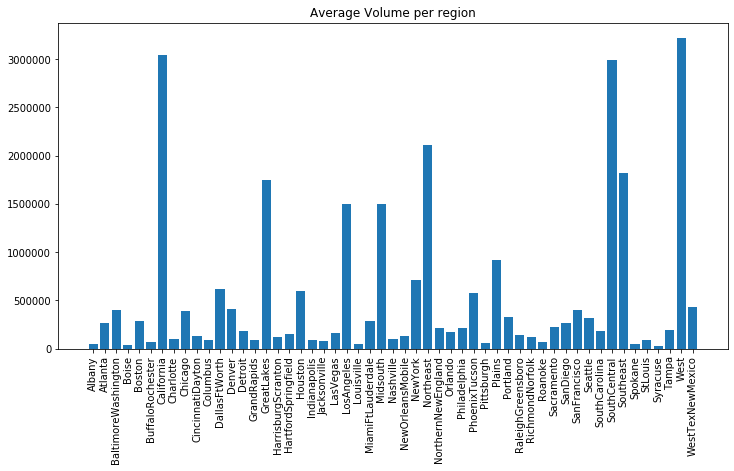

In [12]:
x=[np.mean(y) for y in volume_region]
plt.figure(0,figsize=(12,6))
plt.title("Average Volume per region")
plt.xticks(rotation=90)
plt.bar(regio,x)
plt.show()

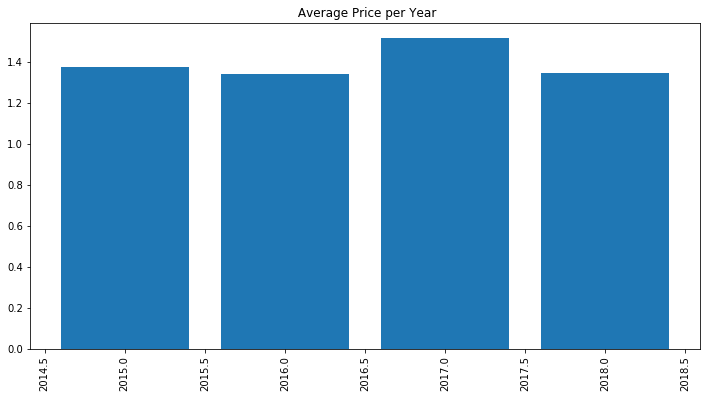

In [13]:
x=[np.mean(y) for y in price_year]
plt.figure(0,figsize=(12,6))
plt.title(" Average Price per Year")
plt.xticks(rotation=90)
plt.bar(years,x)
plt.show()

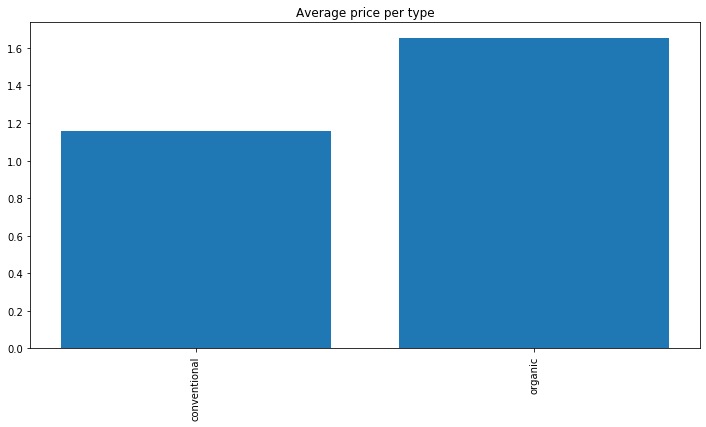

In [14]:
x=[np.mean(y) for y in price_tipo]
plt.figure(0,figsize=(12,6))
plt.title("Average price per type")
plt.xticks(rotation=90)
plt.bar(types,x)
plt.show()

In [15]:
def Analise_per_year(lista,var1,var2,ano_ent):
    lista1=[]
    lista2=[]
    total_price,total_volume=[],[]
    unic=np.unique(lista)
    if lista[0]==region[0]:
        unic=unic[unic!='TotalUS']
    for i in unic:
        for r in range(len(lista)):
            if i==lista[r] and ano[r]==ano_ent:
                lista1.append(var1[r])
                lista2.append(var2[r])
        if lista1!=[] and lista2!=[]:
            total_price.append(lista1)
            total_volume.append(lista2)
            lista1=[]
            lista2=[]
    return total_price,total_volume,unic

In [16]:
price_region_2015,volume_region_2015,regio=Analise_per_year(region,price,volume,2015)
price_region_2016,volume_region_2016,regio=Analise_per_year(region,price,volume,2016)
price_region_2017,volume_region_2017,regio=Analise_per_year(region,price,volume,2017)
price_region_2018,volume_region_2018,regio=Analise_per_year(region,price,volume,2018)

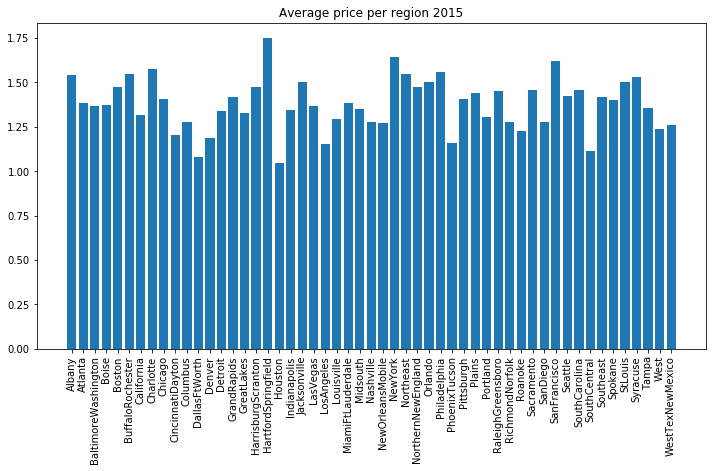

In [17]:
x=[np.mean(y) for y in price_region_2015]
plt.figure(0,figsize=(12,6))
plt.title("Average price per region 2015")
plt.xticks(rotation=90)
plt.bar(regio,x)
plt.show()

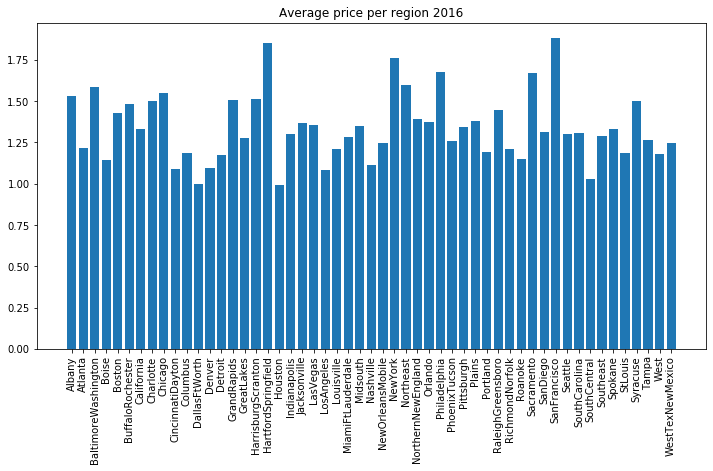

In [18]:
x=[np.mean(y) for y in price_region_2016]
plt.figure(0,figsize=(12,6))
plt.title("Average price per region 2016")
plt.xticks(rotation=90)
plt.bar(regio,x)
plt.show()

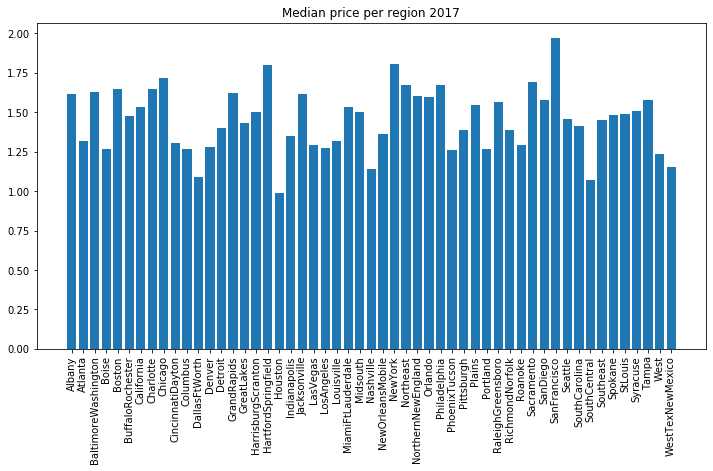

In [19]:
x=[np.median(y) for y in price_region_2017]
plt.figure(0,figsize=(12,6))
plt.title("Median price per region 2017")
plt.xticks(rotation=90)
plt.bar(regio,x)
plt.show()

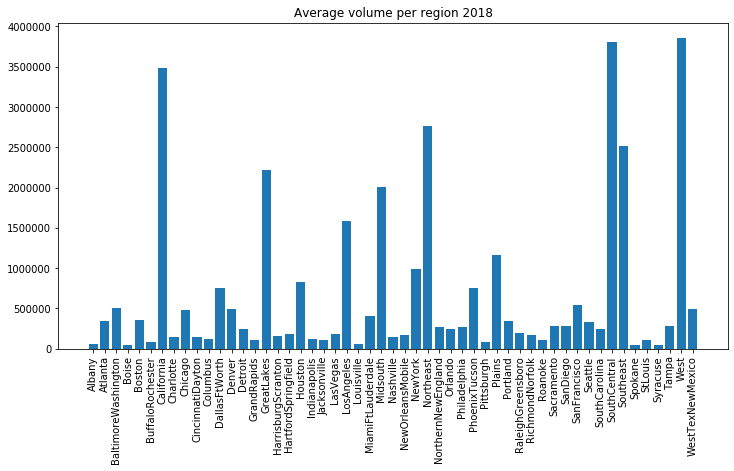

In [20]:
x=[np.mean(y) for y in volume_region_2018]
plt.figure(0,figsize=(12,6))
plt.title("Average volume per region 2018")
plt.xticks(rotation=90)
plt.bar(regio,x)
plt.show()

Initializing data change for ML aplication

In [22]:
organizer_region=dict(zip(regio,np.arange(len(regio))))
organizer_type=dict(zip(types,np.arange(len(types))))
region=df['region'].map(organizer_region)
tipos=tipo.map(organizer_type).astype(np.float64)
region=region.fillna(53)

X=[]
Y=[]
for r in range(len(price)):
    X.append([region[r],ano[r],volume[r],tipos[r],tipo1[r],tipo2[r],tipo3[r],bags1[r],bags2[r]])
    Y.append(price[r])
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=0)
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)
clf=RandomForestRegressor(random_state=1).fit(X_train,y_train)
print(clf.score(X_test,y_test))

C:\Users\vigne\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8230265976842591


As we can see our model of regression scored close to 84% of acurracy in the r^2 score, that relates variance, it is not a great number but it is a beginning in the prediction of prices in the future. We also did an small analysis in the diferent relations between types, years, volume and prices of avocados in the US. We can see that as expected the region with the biggest amount of production is the west coast of the US with the biggest state being California. The type of avocado with the biggest average price is te organic and the one with the biggest production is the conventional one.